In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples=n_samples, noise=0.03, factor=0.42)

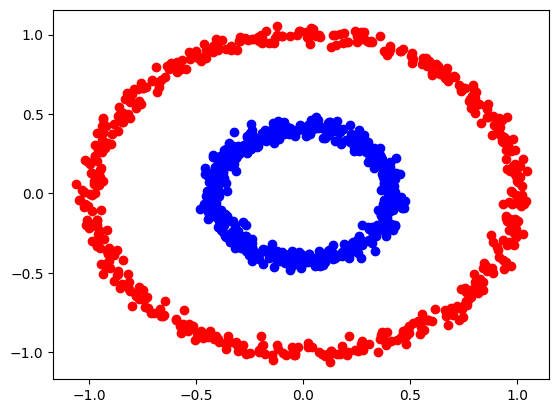

In [3]:
#show only dots with y=0 and y=1 in different colors
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red')
    else:
        plt.scatter(x[i][0], x[i][1], color='blue')

In [5]:
x_train, y_train, x_test, y_test = x[:800], y[:800], x[800:], y[800:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [45]:
x_train[:10], y_train[:10]

(array([[ 0.3772222 , -0.04188912],
        [ 0.2606856 ,  0.40058264],
        [-0.42369927,  0.88892414],
        [ 0.40326375,  0.08482796],
        [-0.18724774, -0.44495633],
        [-0.03966608, -1.00494003],
        [ 0.50334901,  0.86499201],
        [-0.23081619,  0.96996978],
        [ 0.41696344,  0.05346549],
        [-0.43611094, -0.86510109]]),
 array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0]))

In [19]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch


In [39]:
tf.random.set_seed(42)

model = ks.models.Sequential()
model.add(ks.layers.Input(shape=(2,)))
model.add(ks.layers.Dense(5, activation=ks.activations.relu))
model.add(ks.layers.Dense(5, activation=ks.activations.relu))
model.add(ks.layers.Dense(1, activation=ks.activations.sigmoid))

model.compile(optimizer=ks.optimizers.Adam(),
              loss=ks.losses.BinaryCrossentropy(),
              metrics=[ks.metrics.Accuracy()])

history = model.fit(x_train, y_train, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7411 - accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7401 - accuracy: 0.0000e+00 - lr: 1.1220e-04
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7390 - accuracy: 0.0000e+00 - lr: 1.2589e-04
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7378 - accuracy: 0.0000e+00 - lr: 1.4125e-04
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7366 - accuracy: 0.0000e+00 - lr: 1.5849e-04
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.7354 - accuracy: 0.0000e+00 - lr: 1.7783e-04
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.7339 - accuracy: 0.0000e+00 - lr: 1.9953e-04
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7323 - accuracy: 0.0000e+00 - lr: 2.2387e-04
Epoch 9/50
25/25 [==============================

In [40]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 1.1424 - accuracy: 0.0000e+00


[1.1424412727355957, 0.0]

<Axes: xlabel='epoch', ylabel='loss'>

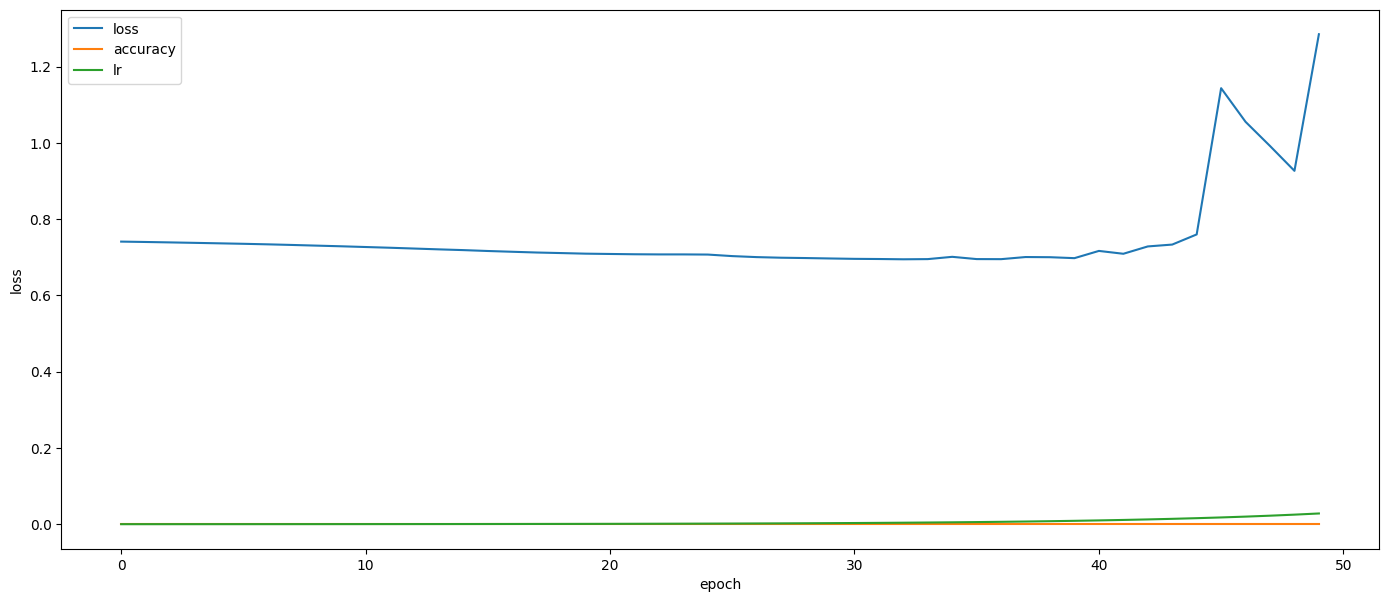

In [41]:
pd.DataFrame(history.history).plot(figsize=(17, 7), xlabel='epoch', ylabel='loss')